<a href="https://colab.research.google.com/github/robertoalotufo/rnap/blob/master/PyTorch/LinearRegressionIrisOptimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear com PyTorch

## Objetivos

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se:
- a função de perda MSE do PyTorch, 
- treinamento dos parâmetros via gradiente descendente usando o otimizador.
- A rede é criada com uma camada nn.Linear()

## Importação dos pacotes

In [1]:
%matplotlib inline
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

## Leitura dos dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = torch.FloatTensor(data[:,0:1])
y_train = torch.FloatTensor(data[:,1:2])

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: torch.Size([50, 1]) torch.float32
y_train.shape: torch.Size([50, 1]) torch.float32
x_train[:5]:
 tensor([[7.0000],
        [6.4000],
        [6.9000],
        [5.5000],
        [6.5000]])
y_train[:5]:
 tensor([[4.7000],
        [4.5000],
        [4.9000],
        [4.0000],
        [4.6000]])


### Normalização dos dados

In [3]:
xt_min = x_train.min()
xt_max = x_train.max()
x_train_n = (x_train - xt_min)/(xt_max - xt_min)

yt_min = y_train.min()
yt_max = y_train.max()
y_train_n = (y_train - yt_min)/(yt_max - yt_min)


In [4]:
x_train_bias = torch.cat([torch.ones(size=(n_samples,1)), x_train_n],dim=1)

In [5]:
x_train_bias.shape

torch.Size([50, 2])

## Criação do modelo da rede

In [6]:
model = torch.nn.Linear(2, 1, bias=False)

### Verificando a inicialização dos parâmetros

In [7]:
#model.weight.data = torch.zeros(1,2)
#torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight.data

tensor([[-0.6661, -0.1387]])

### Testando o predict da rede

In [8]:
model(torch.ones((5,2)))

tensor([[-0.8049],
        [-0.8049],
        [-0.8049],
        [-0.8049],
        [-0.8049]], grad_fn=<MmBackward0>)

## Treinamento

### Definindo função de perda e otimizador

In [9]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

### Laço de treinamento

In [10]:
num_epochs = 100
for epoch in range(num_epochs):
    inputs = x_train_bias
    target = y_train_n

    # forward - predict
    out = model(inputs)

    #loss cálculo da função de perda
    loss = criterion(out, target)
    
    # backward e otimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.item()))

Epoch[20/100], loss: 0.021875
Epoch[40/100], loss: 0.021272
Epoch[60/100], loss: 0.021184
Epoch[80/100], loss: 0.021172
Epoch[100/100], loss: 0.021170


## Avaliação

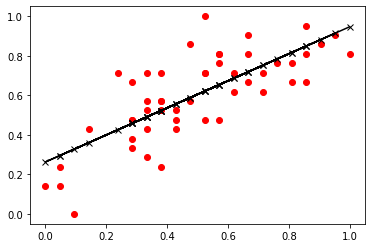

In [11]:
y_pred = model(x_train_bias)
plt.plot(x_train_n, y_train_n,     'ro',  label='Original data')
plt.plot(x_train_n, y_pred.data, 'kx-', label='Fitting Line')
plt.show()

In [15]:
model.weight.data

tensor([[0.2625, 0.6843]])

In [18]:
loss = criterion(y_pred, y_train_n)
loss.item()

0.02116970345377922

# Aprendizados